***

___

# Análise dos dados de internação de pacientes do hospital Sírio Libanês no CTI
##### Por Eduardo Ferreira Gonçalves

## Objetivos:
- Analisar os dados fornecidos (análise exploratória);
- Gerar um modelo preditivo para a evolução dos pacientes para a internação no CTI ou não

## Síntese:
O roteiro de execução do trabalho foi:
1. Análise dos dados;
2. Manipulação dos dados;
3. Escolha dos melhores modelos;
4. Melhoria do modelo escolhido;
5. Análise das predições do modelo;
6. Tentativa de teste de modelo com os dados sem a retirada dos dados correlacionados.
<br>
<br>
    <p>Inicialmente os dados foram analisados quanto ao conteúdo e integridade.</p>
    <p>Quanto aos dados faltantes, o procedimento foi repetir os valores da janela de tempo anterior ou posterior do mesmo paciente, seguindo o procedimento indicado pelo próprio hospital no Kaggle e conforme aula.</p>
    <p>O segundo passo foi ter uma visão geral de como os dados se distribuiam através de histogramas e poder identificar se suas distribuições eram normais, constantes, etc.</p>
O terceiro procedimento foi a retirada dos pacientes que foram internados no CTI na primeira janela de tempo, pois eles não faziam parte do escopo do projeto. Se a intenção é descobrir quais os pacientes evoluirão para uma internação, esses pacientes não são bons parâmetros.</p>
    <p>Em seguida, com os pacientes que sobraram foi feita a manipulação para que a informação da evolução para internação no CTI fosse para a primeira janela e em ato contínuio, as informações das demais janelas foram retirados do dataset.</p>
    <p>A feature AGE_PERCENTIL foi analisada para entender se ela era significativa e como se comportava. Esse dado categórico posteriormente foi codificado de duas maneiras para ver se trazia alguma melhoria no modelo.</p>
    <p>Após todas análises feitas anteriormente, foi feito o procedimento de identificação e retirada dos dados altamente correlacionados, o que gerou 3 tipos de dados. Isso aconteceu porque existem 3 tipos de correlação.</p>
    <p>Assim que os dados foram manipulados e 6 versões dos dados foram separadas, foi feita uma comparação com os modelos de classificação para a escolha do melhor dataset e do melhor modelo.<br>
    <p>Depois da seleção anterior, o foco foi na melhoria dos hiperparâmetros do modelo para aumentar o desempenho do mesmo.</p>
    <p>Com o modelo ajustado, o mesmo foi treinado e posto em teste. Analisando as previsões feitas através da matriz de confusão podemos perceber as fraquezas do modelo "vencedor"</p>
    <p>Por fim, foi feito um teste de modelos com o dataset sem a retirada dos dados correlacionados e comprovou-se que o modelo não ficou melhor.</p>

***

___

# 1. Importação das bibliotecas básicas (manipulação e visualização)

In [1]:
# Manipulação
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Deixar os gráficos do pyplot com o mesmo tema do seaborn
plt.style.use("seaborn")

# Colocar o tema padão do seaborn
sns.set_theme()

# Aumentar o tamanho dos gráficos e da fonte
plt.rc("figure", figsize=(15,8))
plt.rc("font", size=14)

# deixar o número de casas depois do ponto flutuante fixo em 2 casas
pd.options.display.float_format = "{:.2f}".format

In [2]:
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

# 2. Primeira análise e manipulações iniciais

## 2.1. Visão geral do dataframe

In [3]:
# visualização das 5 primeiras e 5 ultimas linhas do dataframe 
#(nesse momento acho melhor do que usar o .head() e o .tail())
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,NaN,NaN,NaN,NaN,-1.00,-1.00,6-12,0
4,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1921,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
1922,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
1923,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0


In [4]:
# tentativa de ver todas as colunas, mas como são muitas dessa maneira não é possível
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [5]:
# Ver todas as colunas, quantas delas há dados faltantes e seu tipo de dado
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1    AGE_ABOVE65                       1925 non-null   int64  
 2    AGE_PERCENTIL                     1925 non-null   object 
 3    GENDER                            1925 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

### Uma coisa que percebemos e também foi  destacada na aula, foi que os pacientes se repetem no dataframe conforme a mudança na janela de horários (metodologia usada no hospital).
### Outra coisa é a quantidade grande de valores NaN na tabela, conforme a documentação dos dados e bem explicado pelo Guilherme, os sinais vitais e dados dos exames de sangue não mudam abruptamente, vamos considerar como medida do horários as medidas dos horários seguintes ou anteriores, mas atentando para que seja do mesmo paciente

### a. Numero de pacientes

In [6]:
# contagem de quantas vezes aparece cada paciente
df.PATIENT_VISIT_IDENTIFIER.value_counts()

0      5
193    5
263    5
262    5
261    5
      ..
126    5
125    5
124    5
123    5
384    5
Name: PATIENT_VISIT_IDENTIFIER, Length: 385, dtype: int64

In [7]:
# confirmar se todos os pacientes se repetem por 5 vezes
df.PATIENT_VISIT_IDENTIFIER.value_counts().unique()

array([5], dtype=int64)

---

### b. Dados faltantes/ mudança de tipo de dados nas variáveis categóricas

In [8]:
df.iloc[:,1:13]

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER
0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
1,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
2,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
3,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
4,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1921,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1922,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1923,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [9]:
for nome in df.iloc[:,1:13].columns:
    print(f'Coluna {nome} tem como valores únicos : {df[nome].unique()}')

Coluna AGE_ABOVE65 tem como valores únicos : [1 0]
Coluna AGE_PERCENTIL tem como valores únicos : ['60th' '90th' '10th' '40th' '70th' '20th' '50th' '80th' '30th'
 'Above 90th']
Coluna GENDER tem como valores únicos : [0 1]
Coluna DISEASE GROUPING 1 tem como valores únicos : [ 0.  1. nan]
Coluna DISEASE GROUPING 2 tem como valores únicos : [ 0.  1. nan]
Coluna DISEASE GROUPING 3 tem como valores únicos : [ 0.  1. nan]
Coluna DISEASE GROUPING 4 tem como valores únicos : [ 0.  1. nan]
Coluna DISEASE GROUPING 5 tem como valores únicos : [ 1.  0. nan]
Coluna DISEASE GROUPING 6 tem como valores únicos : [ 1.  0. nan]
Coluna HTN tem como valores únicos : [ 0.  1. nan]
Coluna IMMUNOCOMPROMISED tem como valores únicos : [ 0.  1. nan]
Coluna OTHER tem como valores únicos : [ 1.  0. nan]


In [10]:
df[df['DISEASE GROUPING 1'].isna()]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
996,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
997,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
998,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,0
999,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOVE_12,0


### esse paciente tem muitas insformações faltantes - Será retirado do dataset no momento oportuno

### Pudemos comprovar que são dados categóricos do dataframe e podemos melhorar o desempenho do mesmo com manipulação dos tipos de dados

---

## 2.2. Preenchimento dos dados faltantes - Variáveis numéricas

In [11]:
dados_categoricos = df.iloc[:, :13]
    
dados_continuos_colunas = df.iloc[:, 13:-2].columns
dados_continuos = df.groupby('PATIENT_VISIT_IDENTIFIER', as_index= False)[dados_continuos_colunas].fillna(method='ffill').fillna(method='bfill')
# diferentemente da aula, acabei escolhendo que os dados fossem inicialmente preenchidos de 'cima para baixo'

janela_e_uti = df.iloc[:, -2:]
   
dados = pd.concat([dados_categoricos, dados_continuos, janela_e_uti], axis=1)
dados.columns = df.columns

In [12]:
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
3,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0
4,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1921,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
1922,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
1923,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0


In [13]:
dados[dados['DISEASE GROUPING 1'].isna()]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
996,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
997,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
998,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0
999,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,ABOVE_12,0


## Depois da manipulação esse ainda é o paciente com NAN

In [14]:
dados.shape

(1925, 231)

In [15]:
dados.dropna().shape

(1920, 231)

## Somente esse paciente tem os dados como NAN

In [16]:
dados = dados.dropna()
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
3,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0
4,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1921,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
1922,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
1923,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0


In [17]:
dados.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1924
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          1920 non-null   int64  
 1    AGE_ABOVE65                       1920 non-null   int64  
 2    AGE_PERCENTIL                     1920 non-null   object 
 3    GENDER                            1920 non-null   int64  
 4    DISEASE GROUPING 1                1920 non-null   float64
 5    DISEASE GROUPING 2                1920 non-null   float64
 6    DISEASE GROUPING 3                1920 non-null   float64
 7    DISEASE GROUPING 4                1920 non-null   float64
 8    DISEASE GROUPING 5                1920 non-null   float64
 9    DISEASE GROUPING 6                1920 non-null   float64
 10   HTN                               1920 non-null   float64
 11   IMMUNOCOMPROMISED                 1920 non-null   floa

## Dataframe pronto

---

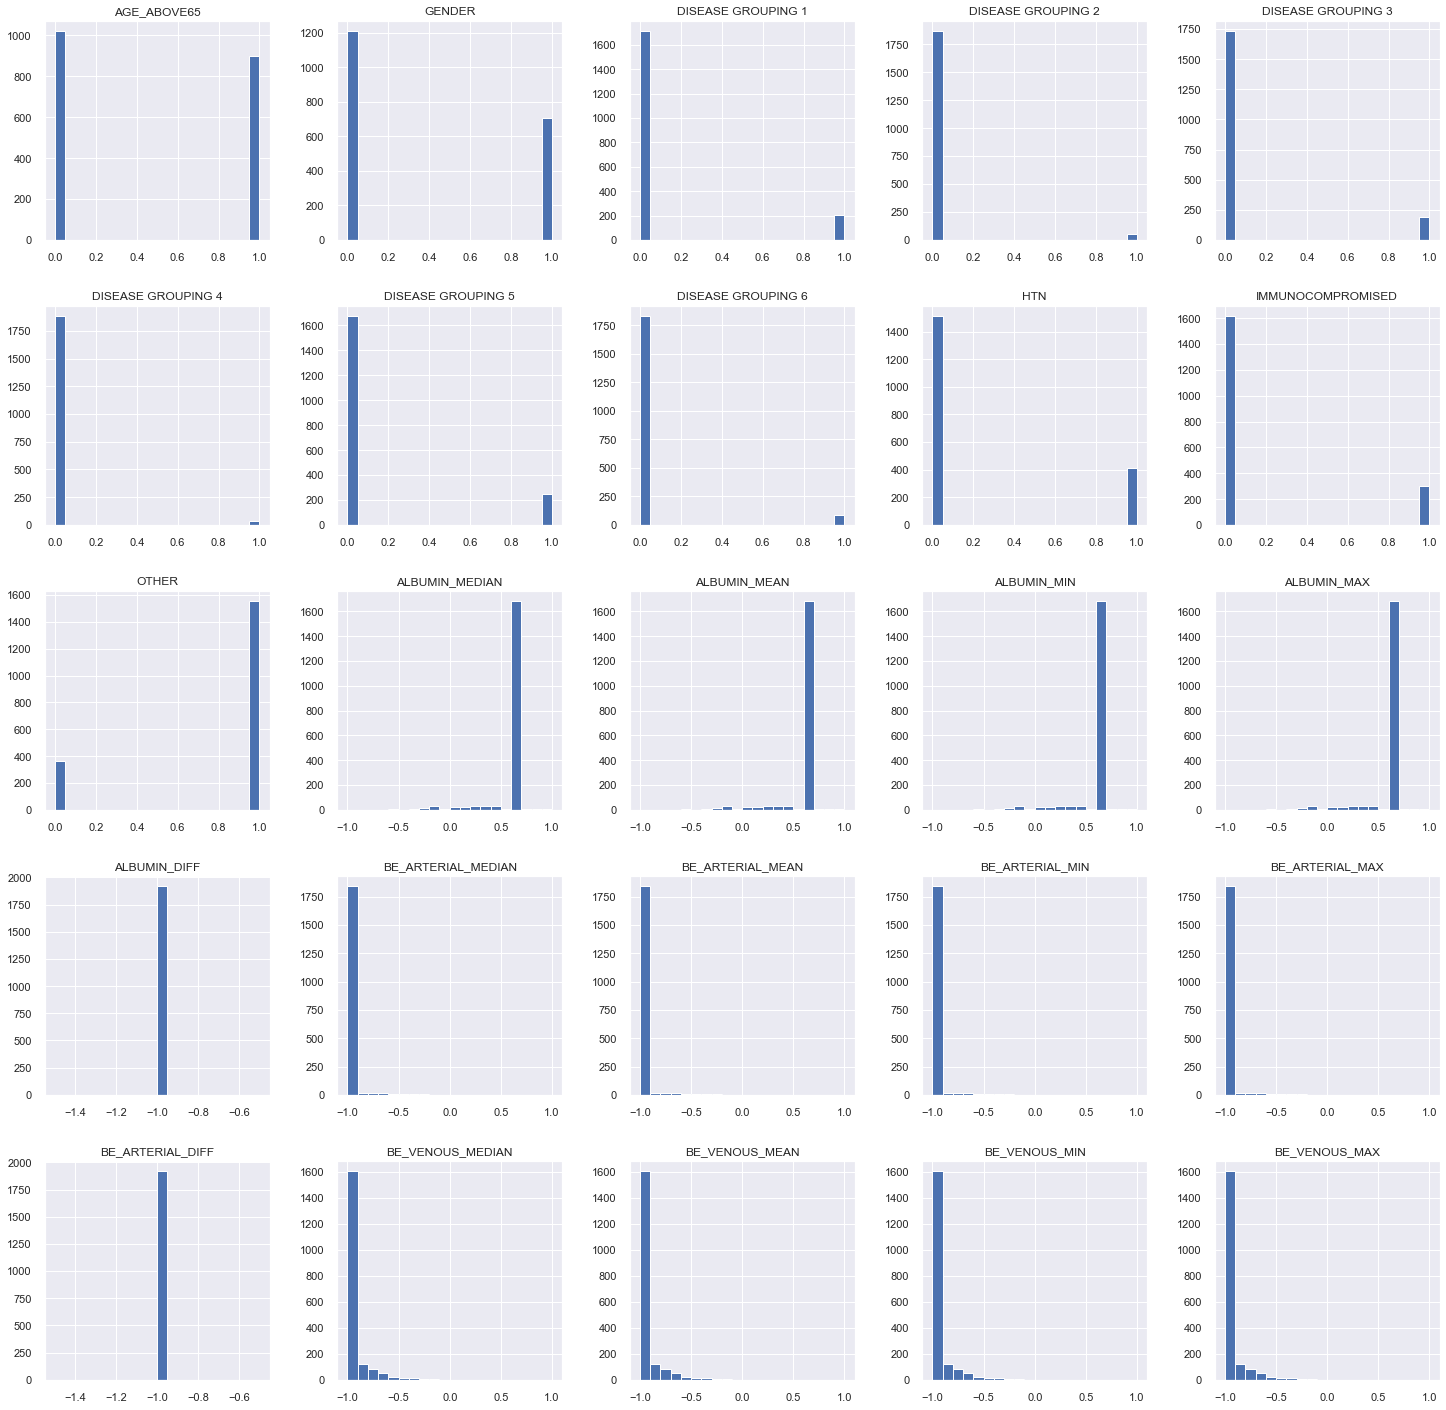

In [18]:
# Forma de visualizar de maneira mais genérica nas distribuições do dataset
# O objetivo inicial é ver se as distribuições são uniformes, normais ou com outra característica
dados.iloc[:,1:27].hist(bins=20 ,figsize=(25,25))
plt.show()

Nesse primeiro trecho de distribuições podemos observar que:
- Há mais pacientes com menos que 65 do que com mais. (se isso é uma informação importante para a classificação, pode ser um fator di viés)
- Há um desequilíbrio de gênero. (_a priori_ acredito que isso não traga problema na solução)
- As incidências com o grupo de doenças de 1 a 6 são bem diferentes (muito mais sem as doenças do que com doenças)
- O mesmo observado anteriormente para HTN (hipertensão arterial) e imuno comprometido (essa diferença pode ser interessante se, mesmo com poucos pacientes isso for um fator preponderante, mas pode ser perigoso para viés)
- NÃO CONSEGUI IDENTIFICAR NA DOCUMENTAÇÃO O QUE SERIA ESSA FEATURE 'OTHER', MUITO GENÉRICA E TEM UMA INCIDÊNCIA MUITO MAIOR QUE NÃO INCIDÊNCIA
- Infelizmente não sou apto para qualificar os dados referentes às medidas dos exames de sangue e os dados se apresentam manipulados para comparação com indices normais, por esse motivo não farei a plotabem das distribuições dos indices restantes

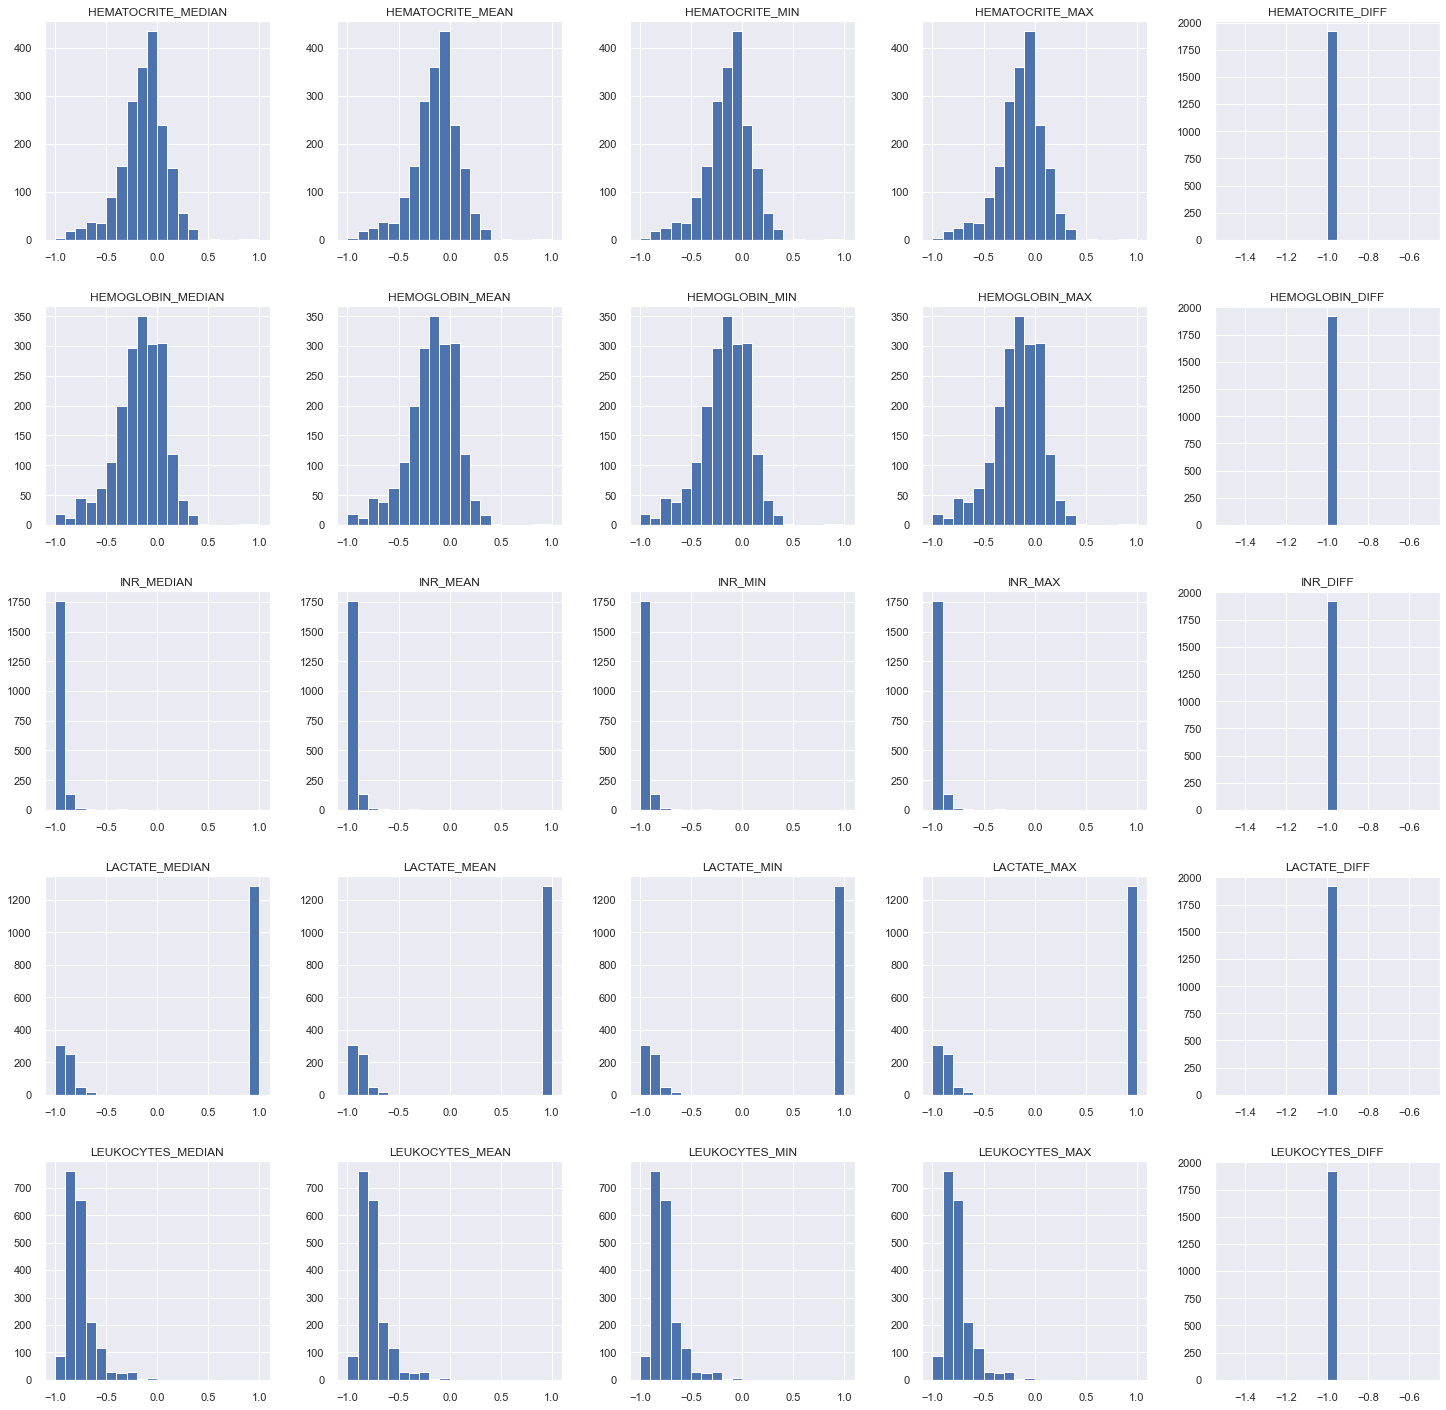

In [19]:
dados.iloc[:,73:98].hist(bins=20 ,figsize=(25,25))
plt.show()

### Deixei essa plotagem para destacar que algumas medidas, mesmo normalizadas, podem apresentar uma distribuição normal ou bem próximo a uma normal

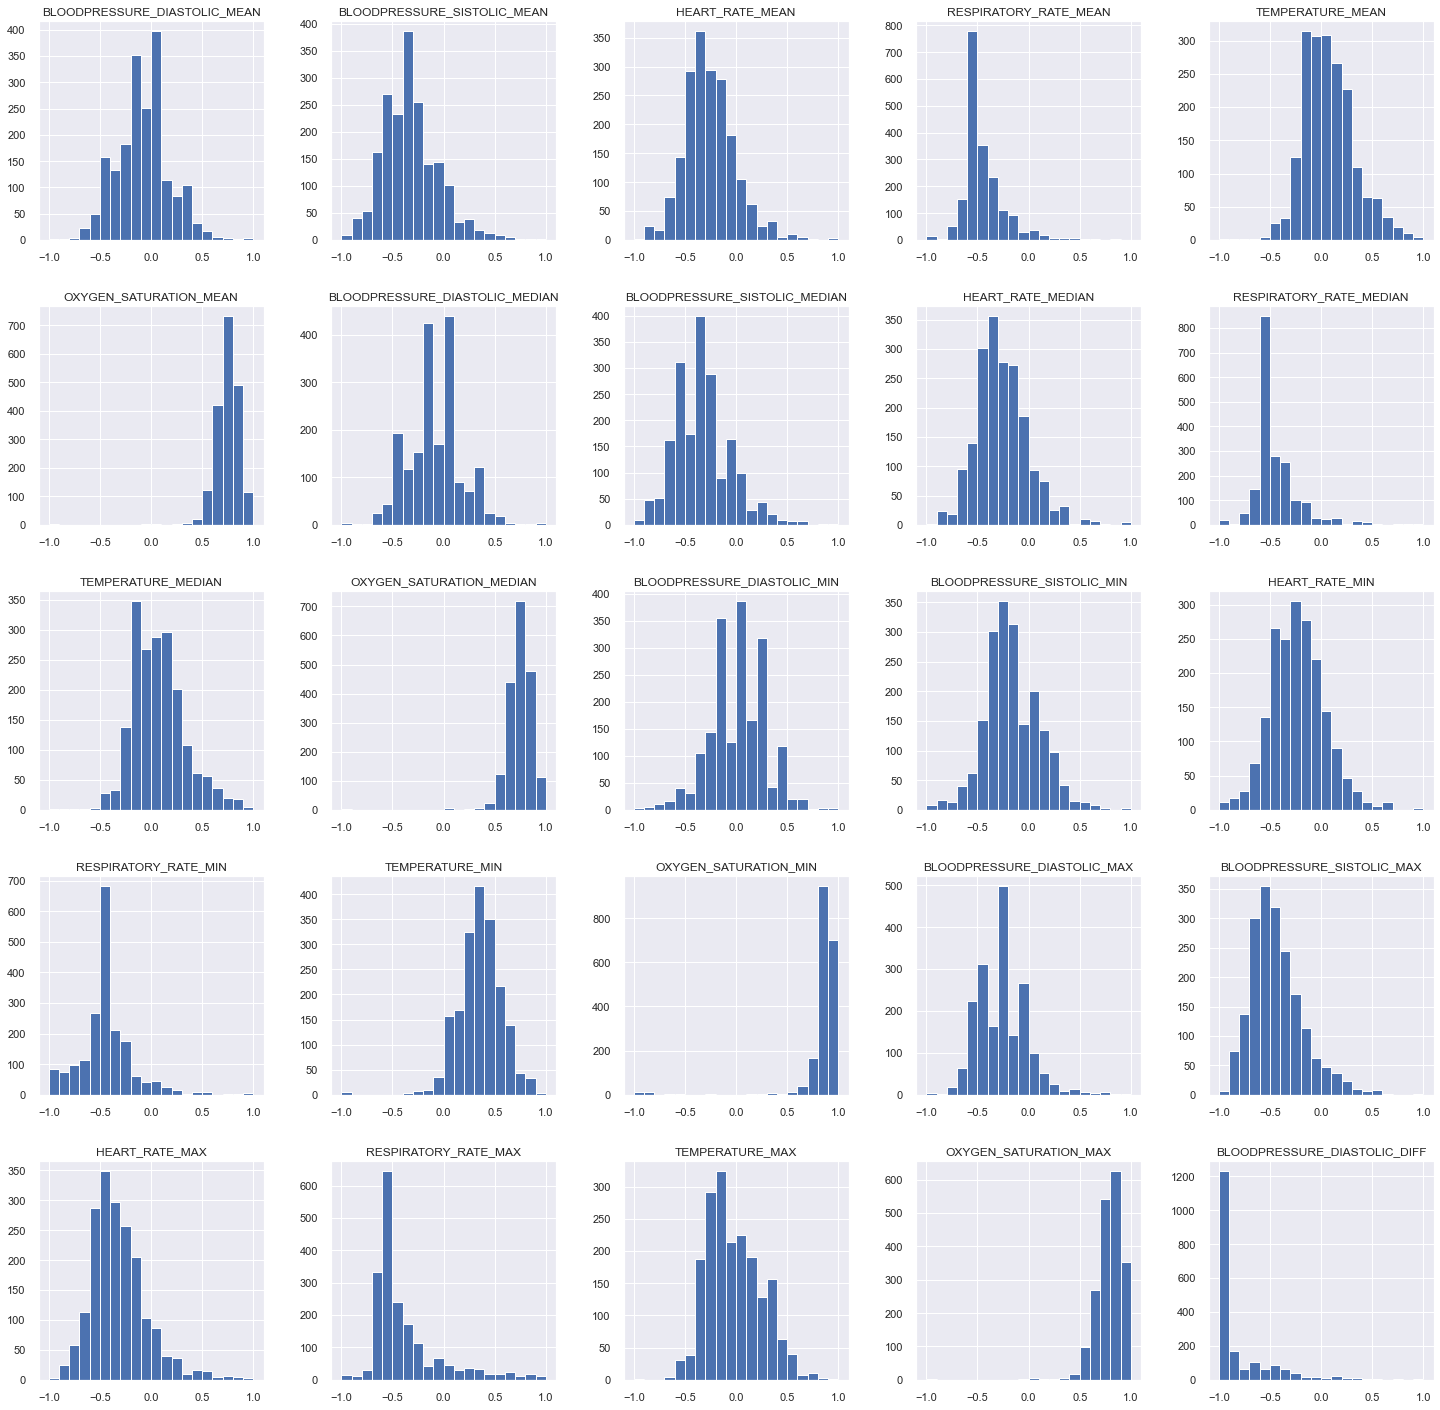

In [20]:
dados.iloc[:,193:218].hist(bins=20 ,figsize=(25,25))
plt.show()

## As medidas das taxas de batimento cardíaco e respiração, temperatura e saturação de oxigÊncio apresentam distribuições mais próximas ao normal

In [21]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.00,1925.00,1925.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,1920.00,...,1177.00,1231.00,1239.00,1240.00,1240.00,1240.00,1177.00,1231.00,1239.00,1925.00
mean,192.00,0.47,0.37,0.11,0.03,0.10,0.02,0.13,0.05,0.21,...,-0.70,-0.77,-0.89,-0.79,-0.72,-0.82,-0.72,-0.77,-0.89,0.27
std,111.17,0.50,0.48,0.31,0.17,0.30,0.14,0.33,0.21,0.41,...,0.48,0.32,0.30,0.32,0.42,0.27,0.45,0.32,0.30,0.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
25%,96.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0.00
50%,192.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-0.98,-0.98,-1.00,-0.98,-0.99,-1.00,-0.98,-0.98,0.00
75%,288.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.65,-0.60,-0.88,-0.65,-0.52,-0.66,-0.63,-0.59,-0.88,1.00
max,384.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Infelizmente com os dados manipulados pelo próprio hospital impossibilita fazer muita análise estatística descritiva mais próxima da realidade

---

## 2.3. Manipulação quanto a janela de tempo

### Retirar os pacientes que já na primeira janela de tempo foi internado
### justificativa razoável é quanto a interferência dos exames terem sido antes ou após sua internação

In [22]:
# ver quantos estão nessa condição
dados.query("WINDOW == '0-2' and ICU == 1")

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
5,1,1,90th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
85,17,0,40th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
135,27,1,60th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
205,41,1,70th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.67,-0.86,-0.69,-0.40,-0.89,-1.00,-0.66,-0.86,0-2,1
235,47,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
240,48,0,60th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
270,54,1,60th,0,0.00,0.00,1.00,0.00,0.00,0.00,...,-1.00,-1.00,-0.89,-0.84,-1.00,-1.00,-1.00,-1.00,0-2,1
310,62,1,70th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
425,85,1,70th,0,0.00,0.00,1.00,0.00,0.00,0.00,...,-0.81,-0.96,-1.00,-1.00,-0.93,-1.00,-0.81,-0.96,0-2,1
450,90,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1


### Ver se há uma preponderância entre idade maior que 65 e a internação na primeira janela

In [23]:
dados.AGE_ABOVE65.value_counts()

0    1020
1     900
Name: AGE_ABOVE65, dtype: int64

### Não há essa preponderância de pessoas mais velhas (fator de risco ao COVID-19)

---

## Retirada dos pacientes que foram internados na primeira janela

In [24]:
a_remover = dados.query("WINDOW == '0-2' and ICU == 1")['PATIENT_VISIT_IDENTIFIER'].values
dados = dados.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
2,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
3,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0
4,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.24,-0.82,-0.39,0.41,-0.23,0.10,-0.24,-0.81,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
1921,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,2-4,0
1922,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,4-6,0
1923,384,0,50th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,6-12,0


### Uma forma de predição solicitada no kaggle foi de que com apenas com as informações da primeira janela saber se a pessoa será internada no CTI (no caso de pessoas que foram internadas da segunda janela em diante).
### Uma outra possibilidade seria retirar os pacientes que foram internados antes da ultima janela para prever a evolução
### Neste trabalho o escolhido foi a primeira perspectiva: Usar os dados da primeira janela para prever o desfecho de internação em UTI ou não pelos seguntes motivos:
- O hospital pediu que essa fosse uma das análises;
- Quanto mais cedo se identificar uma possível internação é melhor

In [25]:
def prepare_window(rows):
    if(np.any(rows['ICU'])): # se em qualquer linha ICU for igual a 1 fazer:
        rows.loc[rows['WINDOW'] == '0-2', 'ICU'] = 1 # pegar a primeira janela e colocar 1 (pessoa foi internada no CTI)
    return rows.loc[rows['WINDOW'] == '0-2'] # retornar apenas as linhas da primeira janela

dados = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False).apply(prepare_window)
dados

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,10,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,15,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,20,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,25,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1900,380,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
348,1905,381,1,Above 90th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.62,-1.00,-1.00,-1.00,-1.00,-1.00,-0.61,-1.00,0-2,0
349,1910,382,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
350,1915,383,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0


In [26]:
# 'resetando' o indice
dados = dados.reset_index().drop(['level_0', 'level_1'], axis=1)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,380,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
348,381,1,Above 90th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.62,-1.00,-1.00,-1.00,-1.00,-1.00,-0.61,-1.00,0-2,0
349,382,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
350,383,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0


In [27]:
## Visualização da consistência dos dados 
dados.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          352 non-null    int64  
 1    AGE_ABOVE65                       352 non-null    int64  
 2    AGE_PERCENTIL                     352 non-null    object 
 3    GENDER                            352 non-null    int64  
 4    DISEASE GROUPING 1                352 non-null    float64
 5    DISEASE GROUPING 2                352 non-null    float64
 6    DISEASE GROUPING 3                352 non-null    float64
 7    DISEASE GROUPING 4                352 non-null    float64
 8    DISEASE GROUPING 5                352 non-null    float64
 9    DISEASE GROUPING 6                352 non-null    float64
 10   HTN                               352 non-null    float64
 11   IMMUNOCOMPROMISED                 352 non-null    float6

---

## 2.4. Analisando a coluna AGE_PERCENTIL

In [28]:
dados.AGE_PERCENTIL.unique()

array(['60th', '10th', '40th', '70th', '20th', '50th', '80th', '30th',
       '90th', 'Above 90th'], dtype=object)

### Análise da coluna AGE_PERCENTIL, conferindo sobre a idade do paciente a cada 10 anos (de zero a mais de 90)
### Somente o 60th pode ter como 0 ou 1 na coluna AGE_ABOVE65

In [29]:
# visão inicial
dados[['AGE_ABOVE65', 'AGE_PERCENTIL']].groupby('AGE_PERCENTIL').sum()

,AGE_ABOVE65
AGE_PERCENTIL,
10th,0
20th,0
30th,0
40th,0
50th,0
60th,29
70th,34
80th,36
90th,28


In [30]:
dados[['AGE_ABOVE65', 'AGE_PERCENTIL']].query(" AGE_PERCENTIL == '60th' ")

,AGE_ABOVE65,AGE_PERCENTIL
0,1,60th
13,1,60th
20,1,60th
67,1,60th
84,1,60th
89,1,60th
98,1,60th
109,1,60th
116,1,60th
127,1,60th


## Somente 1 pessoa com AGE_PERCENTIL de 60th é AGE_ABOVE65

In [31]:
# visao de como os pacientes se distrubuem conforme a distribuição por percentil de idade
dados.AGE_PERCENTIL.value_counts()

20th          42
30th          39
40th          38
10th          37
80th          36
70th          34
Above 90th    34
50th          34
60th          30
90th          28
Name: AGE_PERCENTIL, dtype: int64

In [32]:
ordenamento_age_percentil = {
    '10th':1,
    '20th':2,
    '30th':3,
    '40th':4,
    '50th':5,
    '60th':6,
    '70th':7,
    '80th':8,
    '90th':9,
    'Above 90th':10
}
bins_idade = pd.DataFrame(dados.AGE_PERCENTIL.value_counts())
bins_idade.reset_index(inplace=True)
bins_idade.columns = ['age_percentil', 'contagem']
bins_idade['age_ordenado'] = bins_idade.age_percentil.map(ordenamento_age_percentil)
bins_idade['contagem_normalizada'] = (bins_idade.contagem / bins_idade.contagem.sum()) * 100
bins_idade.set_index('age_ordenado', inplace=True)
bins_idade.sort_index(inplace=True)
bins_idade

,age_percentil,contagem,contagem_normalizada
age_ordenado,,,
1,10th,37,10.51
2,20th,42,11.93
3,30th,39,11.08
4,40th,38,10.80
5,50th,34,9.66
6,60th,30,8.52
7,70th,34,9.66
8,80th,36,10.23
9,90th,28,7.95


In [33]:
def grafico_de_barras(x, y, dados, nome_grafico, rotulo_x, rotulo_y):
    sns.barplot(x= x, y= y, data= dados, palette="flare", )
    plt.title(nome_grafico, fontsize=20, pad=20)
    plt.xlabel(rotulo_x, fontsize=15, labelpad=10)
    plt.ylabel(rotulo_y, fontsize=15, labelpad=10)
    plt.show()

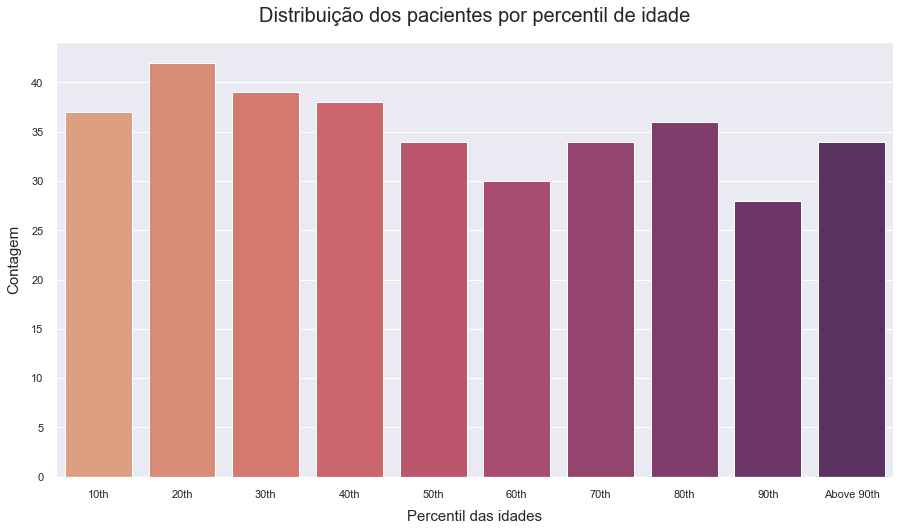

In [34]:
grafico_de_barras(x='age_percentil', y='contagem', dados=bins_idade, 
                  nome_grafico="Distribuição dos pacientes por percentil de idade", 
                  rotulo_x="Percentil das idades", rotulo_y="Contagem")

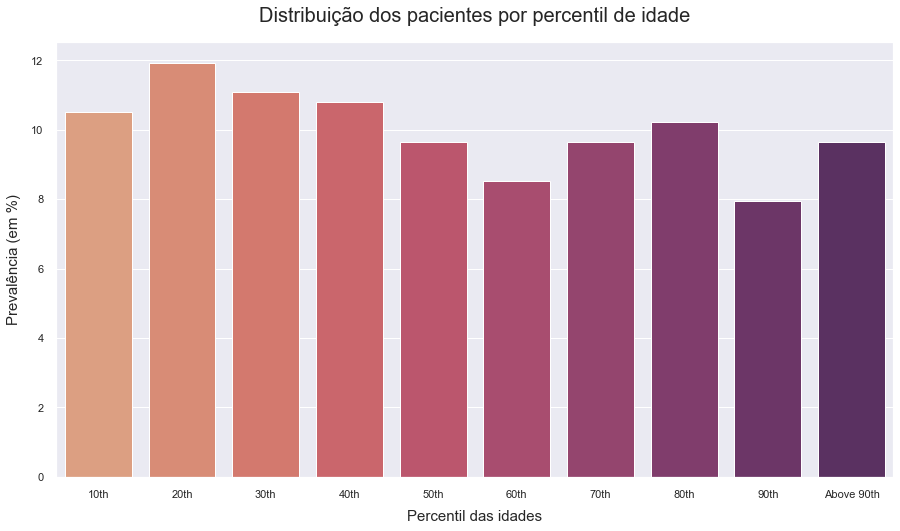

In [35]:
grafico_de_barras(x='age_percentil', y='contagem_normalizada', dados=bins_idade, 
                  nome_grafico="Distribuição dos pacientes por percentil de idade", 
                  rotulo_x="Percentil das idades", rotulo_y="Prevalência (em %)")

## Podemos visualmente perceber que a amostra dos pacientes não está uniformemente distribuída pela idade
## Poderia ser um ponto a ser levantado ao Hospital
## Farei manipulação desta feature mais adiante

---

## 2.5. Identificação da proporção de pacientes que foram internados ou não

In [36]:
dados.ICU.value_counts(normalize=True)

0   0.54
1   0.46
Name: ICU, dtype: float64

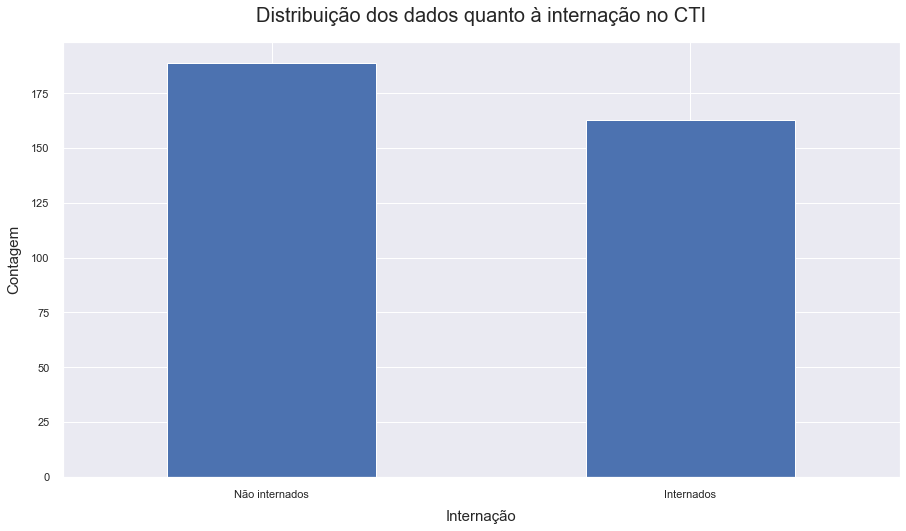

In [37]:
dados.ICU.value_counts().plot(kind='bar')
plt.title('Distribuição dos dados quanto à internação no CTI', fontsize=20, pad=20)
plt.xlabel('Internação', fontsize=15, labelpad=10)
plt.ylabel('Contagem', fontsize=15, labelpad=10)
plt.xticks(ticks=[0 , 1], labels=["Não internados", "Internados"], rotation= 0)
plt.show()

### Podemos perceber que o número de pacientes que evoluem para a internação no CTI ou não está quase equilibrada, mas não está igual. Fator a ser observado no modelo.

---

# 3. Identificação das colunas/features que têm alta correlação

### Observando o nome das colunas, podemos já desconfiar que aquelas que se referem ao mesmo indice (albumina, be e bic arterial, be e bic venosa, ), serão altamente correlacionadas

In [38]:
dados.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 231 columns):
 #    Column                            Non-Null Count  Dtype  
---   ------                            --------------  -----  
 0    PATIENT_VISIT_IDENTIFIER          352 non-null    int64  
 1    AGE_ABOVE65                       352 non-null    int64  
 2    AGE_PERCENTIL                     352 non-null    object 
 3    GENDER                            352 non-null    int64  
 4    DISEASE GROUPING 1                352 non-null    float64
 5    DISEASE GROUPING 2                352 non-null    float64
 6    DISEASE GROUPING 3                352 non-null    float64
 7    DISEASE GROUPING 4                352 non-null    float64
 8    DISEASE GROUPING 5                352 non-null    float64
 9    DISEASE GROUPING 6                352 non-null    float64
 10   HTN                               352 non-null    float64
 11   IMMUNOCOMPROMISED                 352 non-null    float6

In [39]:
dados.iloc[:,13:229].corr()

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,...,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL
ALBUMIN_MEDIAN,1.00,1.00,1.00,1.00,NaN,-0.30,-0.30,-0.30,-0.30,NaN,...,0.05,0.02,0.06,0.06,0.06,0.06,0.05,0.03,0.06,0.06
ALBUMIN_MEAN,1.00,1.00,1.00,1.00,NaN,-0.30,-0.30,-0.30,-0.30,NaN,...,0.05,0.02,0.06,0.06,0.06,0.06,0.05,0.03,0.06,0.06
ALBUMIN_MIN,1.00,1.00,1.00,1.00,NaN,-0.30,-0.30,-0.30,-0.30,NaN,...,0.05,0.02,0.06,0.06,0.06,0.06,0.05,0.03,0.06,0.06
ALBUMIN_MAX,1.00,1.00,1.00,1.00,NaN,-0.30,-0.30,-0.30,-0.30,NaN,...,0.05,0.02,0.06,0.06,0.06,0.06,0.05,0.03,0.06,0.06
ALBUMIN_DIFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLOODPRESSURE_SISTOLIC_DIFF_REL,0.06,0.06,0.06,0.06,NaN,-0.03,-0.03,-0.03,-0.03,NaN,...,0.37,0.37,0.43,0.48,0.78,1.00,0.42,0.42,0.42,0.48
HEART_RATE_DIFF_REL,0.05,0.05,0.05,0.05,NaN,-0.03,-0.03,-0.03,-0.03,NaN,...,0.95,0.32,0.36,0.36,0.37,0.42,1.00,0.34,0.36,0.35
RESPIRATORY_RATE_DIFF_REL,0.03,0.03,0.03,0.03,NaN,-0.03,-0.03,-0.03,-0.03,NaN,...,0.29,0.96,0.32,0.35,0.35,0.42,0.34,1.00,0.31,0.34
TEMPERATURE_DIFF_REL,0.06,0.06,0.06,0.06,NaN,-0.03,-0.03,-0.03,-0.03,NaN,...,0.30,0.28,1.00,0.50,0.36,0.42,0.36,0.31,1.00,0.49


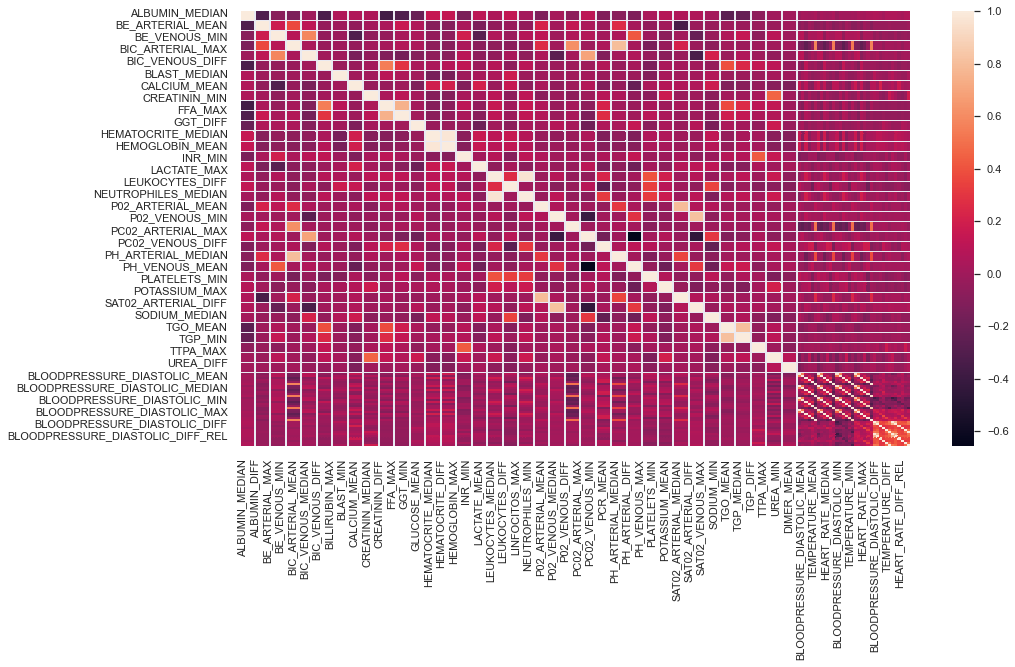

In [40]:
sns.heatmap(dados.iloc[:,13:229].corr())
plt.show()

## Vale mencionar que a função corr(), por padrão, é a aplicação do coeficiente de pearson, então se restringe a correlação linear das variáveis
### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
### https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

### Impossível identificar com os métodos visuais

### A exclusão deverá ser automatizada e aproveitarei a função apresentada durante o módulo 6

In [41]:
def remove_corr_pearson(dados, valor_corte):
    matrix_corr = dados.iloc[:,4:-2].corr().abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [42]:
dados_sem_corr_pearson = remove_corr_pearson(dados, 0.95)
dados_sem_corr_pearson

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.44,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.75,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.30,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.08,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-0.96,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.25,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.99,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,380,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.42,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
348,381,1,Above 90th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.59,-1.00,-1.00,-1.00,-1.00,-0.62,-1.00,-1.00,0-2,0
349,382,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.30,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
350,383,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0


In [43]:
print(f'Com a retirada das features com alta correlação (pearson), o dataframe sai de {dados.shape[1]} colunas para {dados_sem_corr_pearson.shape[1]} colunas.')

Com a retirada das features com alta correlação (pearson), o dataframe sai de 231 colunas para 100 colunas.


In [44]:
def remove_corr_kendall(dados, valor_corte):
    matrix_corr = dados.iloc[:,4:-2].corr(method='kendall').abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [45]:
dados_sem_corr_kendall = remove_corr_kendall(dados, 0.95)
dados_sem_corr_kendall.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.42,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.33,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,0-2,0


In [46]:
def remove_corr_spearman(dados, valor_corte):
    matrix_corr = dados.iloc[:,4:-2].corr(method='spearman').abs()
    matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(bool))
    excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]
    
    return dados.drop(excluir, axis=1)

In [47]:
dados_sem_corr_spearman = remove_corr_spearman(dados, 0.95)
dados_sem_corr_spearman.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,0.90,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.96,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,0.88,0.68,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.94,0.89,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.92,0.84,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,0-2,0


In [48]:
print(f" O número de colunas na retirada da correlação pelos métodos foi a seguinte:\n "
      f"Correlação de Pearson: {dados_sem_corr_pearson.shape[1]} colunas.\n "
      f"Correlação de Kendall: {dados_sem_corr_kendall.shape[1]} "
      f"colunas.\n Correlação de Spearman {dados_sem_corr_spearman.shape[1]} colunas.")

 O número de colunas na retirada da correlação pelos métodos foi a seguinte:
 Correlação de Pearson: 100 colunas.
 Correlação de Kendall: 111 colunas.
 Correlação de Spearman 101 colunas.


## Pode ser que traga mudança na eficiência dos modelos

---

# 4. Transformação do tipo de dados da coluna AGE_PERCENTIL
### Transformação de string em numérico para possibilitar que a feature seja considerada nos modelos

## Farei dois dataframes distintos para identificar qual a melhor manipulação para a predição

## 4.1. A transformação da coluna AGE_PERCENTIL em colunas distintas - One Hot Encoding

In [49]:
def transformacao_onehot_encoding(dados):
    one_hot_age_percentil = dados.AGE_PERCENTIL.copy()
    dados_age_percentil_onehot = dados.drop(['AGE_PERCENTIL'], axis=1)
    one_hot_age_percentil = pd.get_dummies(one_hot_age_percentil)
    
    return dados_age_percentil_onehot.join(one_hot_age_percentil)

In [50]:
dados_sem_corr_pearson_onehot = transformacao_onehot_encoding(dados_sem_corr_pearson)
dados_sem_corr_pearson_onehot.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
2,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0


## 4.2. A transformação da coluna AGE_PERCENTIL em códigos numéricos

In [51]:
from sklearn.preprocessing import LabelEncoder

def codificacao_de_rotulos(dados):
    label_encoder = LabelEncoder() # instanciamento da classe
    dados_codificado = dados.copy()
    dados_codificado.AGE_PERCENTIL = label_encoder.fit_transform(dados_codificado.AGE_PERCENTIL)

    return dados_codificado

In [52]:
dados_sem_corr_pearson_labelencoder = codificacao_de_rotulos(dados_sem_corr_pearson)
dados_sem_corr_pearson_labelencoder.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.44,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.75,0-2,1
2,3,0,3,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.30,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.08,-1.00,-0.88,-0.92,-0.88,-0.95,-0.98,-0.96,0-2,0
4,5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.25,-0.83,-0.75,-0.98,-1.00,-0.98,-0.98,-0.99,0-2,0


---

# Com as manipulações apresentadas de correlação e codificação da feature categórica em numérica ficamos com 6 possibilidades de dados para treinar os modelos:
## - 3 possibilidades de correlação e 2 de codificação 

In [53]:
# Os dados sem a correlação de pearson já foi implementada na conferência das funções criadas
# dados_sem_corr_pearson_onehot
# dados_sem_corr_pearson_labelencoder

dados_sem_corr_spearman_onehot = transformacao_onehot_encoding(dados_sem_corr_spearman)
dados_sem_corr_spearman_labelencoder = codificacao_de_rotulos(dados_sem_corr_spearman)

dados_sem_corr_kendall_onehot = transformacao_onehot_encoding(dados_sem_corr_kendall)
dados_sem_corr_kendall_labelencoder = codificacao_de_rotulos(dados_sem_corr_kendall)

In [54]:
display(dados_sem_corr_spearman_onehot.head(2), dados_sem_corr_spearman_labelencoder.head(2), 
        dados_sem_corr_kendall_onehot.head(2), dados_sem_corr_kendall_labelencoder.head(2),
       dados_sem_corr_pearson_onehot.head(2), dados_sem_corr_pearson_labelencoder.head(2))

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,OXYGEN_SATURATION_MIN,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,...,0.90,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.96,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,0-2,1


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.42,0.74,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.10,1.00,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,0-2,1


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-0.25,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.44,-0.55,-0.53,-0.60,-0.76,-1.00,-0.96,-0.75,0-2,1


---

# 5. Importação das bibliotecas de Machine Learning

In [55]:
# metricas e seleção de modelos
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix, accuracy_score


# modelos
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# geração de números inteiros aleatórios
from scipy.stats import randint

# 6. Instanciando os modelos

In [56]:
modelo_dummy = DummyClassifier()
modelo_arvore_decisao = DecisionTreeClassifier()
modelo_regressao_logistica = LogisticRegression()
modelo_floresta_aleatoria = RandomForestClassifier()
modelo_k_vizinhos = KNeighborsClassifier()

# 7. Metricas iniciais sem configuração específica dos hiperparâmetros

 ### Para o treinamento dos modelos, além da coluna que vamos predizer, vamos retirar o número de identificação do paciente porque não faz sentido usar e a janela de tempo que é a mesma para todos 

---

In [57]:
def roda_modelo_cv(modelo, dados, n_splits, n_repeats):
    
    np.random.seed(42)
    dados = dados.sample(frac=1).reset_index(drop=True)
    
    x_columns = dados.columns
    y = dados['ICU']
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats) 
    resultados = cross_validate(modelo, x, y, cv=cv, scoring='roc_auc', return_train_score=True)
    
    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])
    
    print(f"AUC médio teste: {auc_medio} - AUC médio treino: {auc_medio_treino}")
    
    return auc_medio, auc_medio_treino

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
modelos = [modelo_dummy, modelo_arvore_decisao, modelo_regressao_logistica, modelo_floresta_aleatoria, modelo_k_vizinhos]
dados_sem_corr = [dados_sem_corr_pearson_onehot, dados_sem_corr_pearson_labelencoder,
                  dados_sem_corr_spearman_onehot, dados_sem_corr_spearman_labelencoder,
                  dados_sem_corr_kendall_onehot, dados_sem_corr_kendall_labelencoder]

for modelo in modelos:
    print('\n')
    print(f'Modelo {modelo}')
    for dados_selecionados in dados_sem_corr:
        roda_modelo_cv(modelo, dados_selecionados, 3, 5)



Modelo DummyClassifier()
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5


Modelo DecisionTreeClassifier()
AUC médio teste: 0.6355507455507456 - AUC médio treino: 1.0
AUC médio teste: 0.6416466249799584 - AUC médio treino: 1.0
AUC médio teste: 0.6404553471220138 - AUC médio treino: 1.0
AUC médio teste: 0.6389770723104058 - AUC médio treino: 1.0
AUC médio teste: 0.629323392656726 - AUC médio treino: 1.0
AUC médio teste: 0.6424498957832292 - AUC médio treino: 1.0


Modelo LogisticRegression()
AUC médio teste: 0.7549031763846579 - AUC médio treino: 0.8689714810679813
AUC médio teste: 0.7656469456469457 - AUC médio treino: 0.8595283939830322
AUC médio teste: 0.7561370316925873 - AUC médio treino: 0.8689073885302222
AUC médio teste: 0.764889458963533 - AUC médio treino: 

## Com esse teste podemos perceber que dos modelos testados, o melhor foi o RandomForestClassifier, que mesmo sobreajustado no treino, foi o que melhor perfomou

## Outro ponto é o conjunto de dados manipulados.
## Podemos perceber que a diferença dos modelos de correlação escolhidos há uma pequena diferença entre eles e o melhor foi o mesmo escolhido na aula:
 - ## dados_sem_corr_pearson_labelencoder

---

## 7.2. função com a função de calcular os melhores hiperparâmetros do modelo escolhido de maneira randomica

In [60]:
def roda_modelo_RandomizedSearchCV(modelo, dados, n_splits, n_repeats, espaco_de_parametros, n_iter, semente_aleatoria=42):

    np.random.seed(semente_aleatoria)
    dados = dados.sample(frac=1).reset_index(drop=True) # fazer o embaralhamento dos dados do dataset, não tem esse parametro no RepeatedStratifiedKFold 
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)
    


    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats) # fazer a separação diversas vezes para reduzir os efeitos da aleatoriedade

    busca = RandomizedSearchCV(modelo, param_distributions=espaco_de_parametros, # busca aleatória  dos hiper-parâmetros
                                n_iter = n_iter, cv = cv, scoring='roc_auc',
                                return_train_score=True)
    busca.fit(x, y)

    resultados = pd.DataFrame(busca.cv_results_)

    auc_medio_teste = resultados.iloc[busca.best_index_]['mean_test_score']
    auc_medio_treino = resultados.iloc[busca.best_index_]['mean_train_score']

    auc_std = resultados.iloc[busca.best_index_]['std_test_score']

    print(f'AUC médio Treino  {auc_medio_treino} \nAUC médio Teste {auc_medio_teste}')
    print(busca.best_estimator_)

### Floresta Aleatória

In [61]:
espaco_de_parametros = {"n_estimators" :randint(30, 201), "max_depth" : randint(3, 20),
    "min_samples_split" : randint(5, 131), "min_samples_leaf" : randint(5, 131),
    "bootstrap" : [True, False], "criterion" : ["gini", "entropy"]}

roda_modelo_RandomizedSearchCV(modelo_floresta_aleatoria, dados_sem_corr_pearson_labelencoder, 10, 20, espaco_de_parametros, 20)

AUC médio Treino  0.8738659068770502 
AUC médio Teste 0.8009650197798416
RandomForestClassifier(max_depth=11, min_samples_leaf=16, min_samples_split=121,
                       n_estimators=158)


---

# 8. Análise do modelo com os parâmetros ajustados

In [62]:
modelo_floresta_aleatoria_melhorado = RandomForestClassifier(max_depth=11, min_samples_leaf=16, min_samples_split=121, n_estimators=158, random_state=42)

In [63]:
x_columns = dados_sem_corr_pearson_labelencoder.columns
y = dados_sem_corr_pearson_labelencoder["ICU"]
x = dados_sem_corr_pearson_labelencoder[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=True, stratify=y)


modelo_floresta_aleatoria_melhorado.fit(x_treino, y_treino)
predicao = modelo_floresta_aleatoria_melhorado.predict(x_teste)

In [64]:
print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        38
           1       0.94      0.52      0.67        33

    accuracy                           0.76        71
   macro avg       0.82      0.74      0.74        71
weighted avg       0.81      0.76      0.75        71



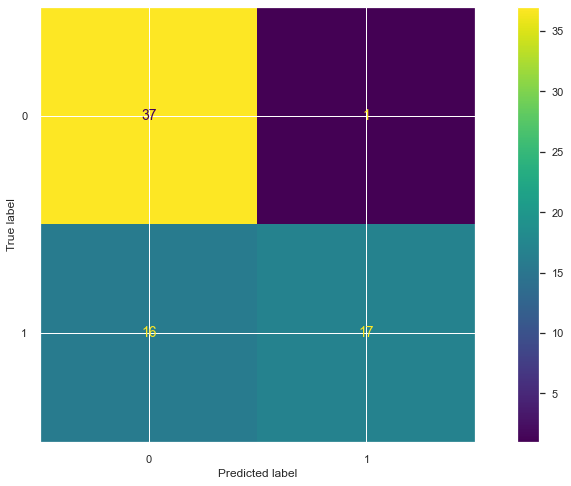

In [65]:
plot_confusion_matrix(modelo_floresta_aleatoria_melhorado, x_teste, y_teste)

## O modelo conseguiu prever com bastante acertividade o verdadeiro positivo, mas não é tão eficiente com a previsão de verdadeiro negativo, mesmo que a maioria das previsões tenham sido corretas, o valor de falsos negativos é quase o valor de verdadeiros positivos.

---

# 8. Usando os dados sem a retirada das colunas de correlação

In [66]:
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,3,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,5,0,10th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,380,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
348,381,1,Above 90th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.62,-1.00,-1.00,-1.00,-1.00,-1.00,-0.61,-1.00,0-2,0
349,382,0,50th,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
350,383,0,40th,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0


## 8.1. Transformarei a coluna AGE_PERCENTIL conforme funções anteriores

In [67]:
dados_onehot = transformacao_onehot_encoding(dados)
dados_onehot.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0,1,0,0.00,0.00,0.00,0.00,1.00,1.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,2,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
2,3,0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0
4,5,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,0,0,0,0,0,0,0,0


In [68]:
dados_labelencoder = codificacao_de_rotulos(dados)
dados_labelencoder.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,5,0,0.00,0.00,0.00,0.00,1.00,1.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,1
1,2,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-0.96,-0.52,-0.35,-0.75,-0.76,-1.00,-0.96,0-2,1
2,3,0,3,1,0.00,0.00,0.00,0.00,0.00,0.00,...,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,0-2,0
3,4,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.95,-0.98,-1.00,-0.88,-0.96,-0.87,-0.95,-0.98,0-2,0
4,5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.98,-0.98,-0.86,-0.71,-0.99,-1.00,-0.98,-0.98,0-2,0


## 8.2. Usarei a função que compara os modelos

In [69]:
modelos = [modelo_dummy, modelo_arvore_decisao, modelo_regressao_logistica, modelo_floresta_aleatoria, modelo_k_vizinhos]
dados_com_corr = [dados_onehot, dados_labelencoder]

for modelo in modelos:
    print('\n')
    print(f'Modelo {modelo}')
    for dados_selecionados in dados_com_corr:
        roda_modelo_cv(modelo, dados_selecionados, 3, 5)



Modelo DummyClassifier()
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5


Modelo DecisionTreeClassifier()
AUC médio teste: 0.6186307519640852 - AUC médio treino: 1.0
AUC médio teste: 0.637312810646144 - AUC médio treino: 1.0


Modelo LogisticRegression()
AUC médio teste: 0.7463474248659434 - AUC médio treino: 0.8857037234798022
AUC médio teste: 0.7558441558441558 - AUC médio treino: 0.8773167699518363


Modelo RandomForestClassifier()
AUC médio teste: 0.7857361979584202 - AUC médio treino: 1.0
AUC médio teste: 0.7867789001122335 - AUC médio treino: 1.0


Modelo KNeighborsClassifier()
AUC médio teste: 0.6699125291717885 - AUC médio treino: 0.8428269168882488
AUC médio teste: 0.692622877808063 - AUC médio treino: 0.8546973402945199


### Resultados muito próximos, mas escolherei o melhor modelo com o melhor fonte de dados

## 8.3. Encontrar os melhores hiperparâmetros

In [70]:
#espaco_de_parametros = {"n_estimators" :randint(30, 201), "max_depth" : randint(3, 20),
#    "min_samples_split" : randint(5, 131), "min_samples_leaf" : randint(5, 131),
#    "bootstrap" : [True, False], "criterion" : ["gini", "entropy"]}

#roda_modelo_RandomizedSearchCV(modelo_floresta_aleatoria, dados_labelencoder, 10, 20, espaco_de_parametros, 20)

# Essa celula deu como resposta o comentário abaixo e comentrei o código por conta de tempo de execução do notebook

"""
AUC médio Treino  0.8721765077576332 
AUC médio Teste 0.7867640608875129
RandomForestClassifier(max_depth=11, min_samples_leaf=16, min_samples_split=121,
                       n_estimators=158)
"""

AUC médio Treino  0.8721765077576332 
AUC médio Teste 0.7867640608875129
RandomForestClassifier(max_depth=11, min_samples_leaf=16, min_samples_split=121,
                       n_estimators=158)


### O resultado de ajustes dos hiperparâmetros são os mesmos, mas a pontuação média AUC de teste é um pouco menor

In [71]:
modelo_floresta_aleatoria_melhorado_total = RandomForestClassifier(max_depth=11, min_samples_leaf=16, min_samples_split=121, n_estimators=158, random_state=42)

x_columns = dados_labelencoder.columns
y = dados_labelencoder["ICU"]
x = dados_labelencoder[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=True, stratify=y)


modelo_floresta_aleatoria_melhorado_total.fit(x_treino, y_treino)
predicao = modelo_floresta_aleatoria_melhorado_total.predict(x_teste)

print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        38
           1       0.83      0.61      0.70        33

    accuracy                           0.76        71
   macro avg       0.78      0.75      0.75        71
weighted avg       0.77      0.76      0.75        71



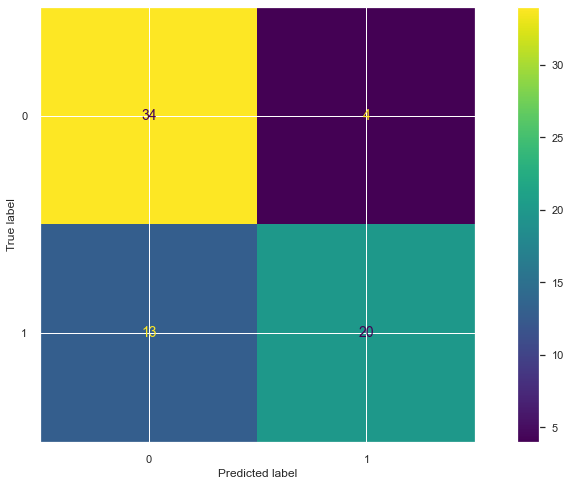

In [72]:
plot_confusion_matrix(modelo_floresta_aleatoria_melhorado_total, x_teste, y_teste)

## Podemos comprovar que as manipulações feitas são benéficas ao modelo. Retirando os dados correlacionados houve melhora 

---

# 9. Tentativa de melhora do modelo retirando todos os dados correlaciondados, nos 3 métodos em um só dataset

In [73]:
dados_sem_corr_1 = remove_corr_pearson(dados, 0.95)
dados_sem_corr_2 = remove_corr_kendall(dados_sem_corr_1, 0.95)
dados_sem_correlacao = remove_corr_spearman(dados_sem_corr_2, 0.95)
dados_sem_correlacao.shape

(352, 98)

In [74]:
dados_sem_correlacao_onehot = transformacao_onehot_encoding(dados_sem_correlacao)
dados_sem_correlacao_labelencoder = codificacao_de_rotulos(dados_sem_correlacao)

In [75]:
modelos = [modelo_dummy, modelo_arvore_decisao, modelo_regressao_logistica, modelo_floresta_aleatoria, modelo_k_vizinhos]
dados_com_corr = [dados_sem_correlacao_onehot, dados_sem_correlacao_labelencoder]

for modelo in modelos:
    print('\n')
    print(f'Modelo {modelo}')
    for dados_selecionados in dados_com_corr:
        roda_modelo_cv(modelo, dados_selecionados, 3, 5)



Modelo DummyClassifier()
AUC médio teste: 0.5 - AUC médio treino: 0.5
AUC médio teste: 0.5 - AUC médio treino: 0.5


Modelo DecisionTreeClassifier()
AUC médio teste: 0.6381721981721981 - AUC médio treino: 1.0
AUC médio teste: 0.6499102132435467 - AUC médio treino: 1.0


Modelo LogisticRegression()
AUC médio teste: 0.7554892843781732 - AUC médio treino: 0.8685096192741452
AUC médio teste: 0.765080433969323 - AUC médio treino: 0.8590255866759436


Modelo RandomForestClassifier()
AUC médio teste: 0.8015666363814512 - AUC médio treino: 1.0
AUC médio teste: 0.8015896175155436 - AUC médio treino: 1.0


Modelo KNeighborsClassifier()
AUC médio teste: 0.691781661411291 - AUC médio treino: 0.8546756315317307
AUC médio teste: 0.7168371546149324 - AUC médio treino: 0.861865726582852


In [76]:
espaco_de_parametros = {"n_estimators" :randint(30, 201), "max_depth" : randint(3, 20),
    "min_samples_split" : randint(5, 131), "min_samples_leaf" : randint(5, 131),
    "bootstrap" : [True, False], "criterion" : ["gini", "entropy"]}

roda_modelo_RandomizedSearchCV(modelo_floresta_aleatoria, dados_sem_correlacao_labelencoder, 10, 20, espaco_de_parametros, 20)

AUC médio Treino  0.9270820087948662 
AUC médio Teste 0.800030744754042
RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16,
                       min_samples_leaf=20, min_samples_split=18,
                       n_estimators=144)


In [80]:
modelo_floresta_aleatoria_sem_correlacao = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=16,
                                                                  min_samples_leaf=20, min_samples_split=18,
                                                                  n_estimators=144, random_state=42)


x_columns = dados_sem_correlacao_labelencoder.columns
y = dados_sem_correlacao_labelencoder["ICU"]
x = dados_sem_correlacao_labelencoder[x_columns].drop(["PATIENT_VISIT_IDENTIFIER", 'ICU', 'WINDOW'], axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.8, random_state=42, shuffle=True, stratify=y)


modelo_floresta_aleatoria_sem_correlacao.fit(x_treino, y_treino)
predicao = modelo_floresta_aleatoria_sem_correlacao.predict(x_teste)

print(classification_report(y_teste, predicao))

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        38
           1       0.81      0.64      0.71        33

    accuracy                           0.76        71
   macro avg       0.77      0.75      0.75        71
weighted avg       0.77      0.76      0.76        71



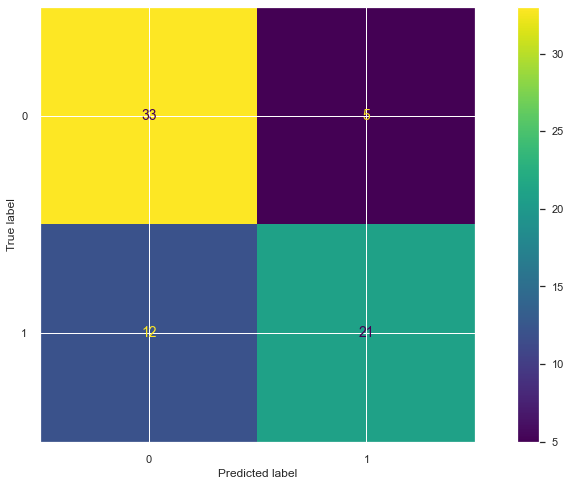

In [81]:
plot_confusion_matrix(modelo_floresta_aleatoria_sem_correlacao, x_teste, y_teste)

# Conclusão

<p>Quanto à ferramenta podemos perceber que, via de regra, o melhor modelo para classificação disponível no SKLEARN é a RandomForestClassifier.</p>
<p>Mesmo depois de muita manipulação dos dados, retirada das features correlaciondas individualmente ou totalmente os modelos apresentam coincidentemente ou não o valor de verdadeiros positivos e verdadeiros negativos somando 54 e quanto ao falso negativo e falso positivo repetimos a mesma soma de 17.</p>
<p>Então poderíamos dizer que esses modelos têm taxa de acertar sua previsão em 76,06 %. A diferença eles está na capacidade de ter menos falsos negativos e falsos positivos.</p>
<p>Considero que dentre os erros de previsão o mais danoso é o falso negativo e o modelo que apresentou o menor número em produção foi esse último, retirando os dados correlacionados das 3 formas no mesmo dataset e som a codificação numérica em uma unica feature da AGE_PERCENTIL, que foi conveniente no caso concreto uma vez que quento mais velho o paciente, maior a possibilidade de internação no CTI</p>